In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as soc 
from sigfig import round
from scipy import constants as const
from scipy.odr import *


def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
#Konstanten definieren
L = 0.07 # in m 
l = 0.455 # in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

In [4]:
#Daten der B-Felder importieren
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

In [40]:
#Definieren der notierten Daten

#Temperatur [K]
T = np.array([458.15, 458.65,458.65,458.65,458.65,458.65,458.65,458.65,458.65,459.15])
uTS = np.array([0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0])   #Schwankung der T 
uT1 = 1/(2*np.sqrt(3))                                  #Ableseungenauigkeit

#Spulenstrom [A]
I = [0.33,0.395,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]
uA = 0.01/(2*np.sqrt(3))                                #Ableseungenauigkeit
uIS = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]         #Schwankung von I 

#Positionen der Spindel [Schritte]
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]


In [41]:
#Unsicherheit des Ofens berechnen 
a = 1
u_Ofen = np.sqrt(((a)/(2 * np.sqrt(3)))**2+(1)**2)

#Umrechnung in mu m
u_OfG = u_Ofen*10.5

C:\Users\jesie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jesie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jesie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jesie\AppData\Local\Packages\PythonSoftwareFounda

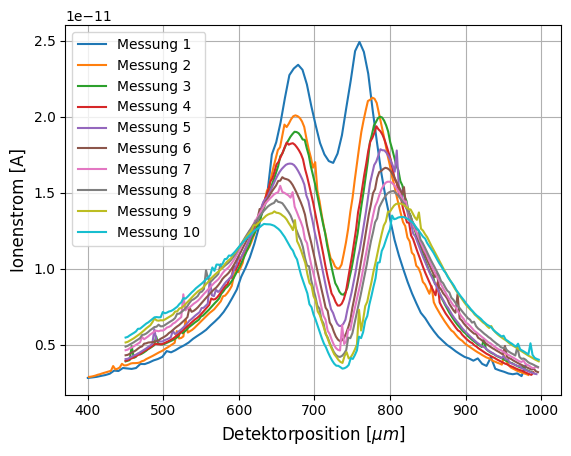

In [42]:
#Lineares Modell
def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

#Offset berechen
bc = []

for  i in range(len(xcalib)):
    popt,_ = soc.curve_fit(linear,xcalib[i],ycalib[i])
    
    #Fit anwenden und umrechnen in mu m
    bc.append((popt[1]*bfields[i][:,0]+popt[0])*10.5)
    
    #plt.plot(bfields[i][:,0],bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot((popt[1]*bfields[i][:,0]+popt[0]),bfields[i][:,1],label="Messung "+str(i+1))
    
    plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [43]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [45]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitdoublegaussian(x:np.ndarray,y:np.ndarray,p0:float,ue:np.ndarray,uue:np.ndarray):
    x,y = x,y
    popt1,pcov1 = soc.curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt1[4])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = np.abs(mean-popt1[1])
    ue.append(dprint)
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt1[5])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = np.sqrt((0.5*up1 )**2 + (0.5*up2)**2)
    uue.append(ud)

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt1[4],2), "$\pm$", np.round(up1, 2), " & ", np.round(dprint,2), "$\pm$", np.round(ud,2), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    plt.scatter(x,y,label="Daten",s=2,c="red")
    plt.plot(x,doublegaussian(x,*popt1),label="Fit")
    plt.legend(loc=0)
    plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    plt.grid(True, which = "major")
    #plt.savefig("plots/doublegauss.pdf")
    plt.show()

1& 7105.71 $\pm$ 307.63  &  7993.72 $\pm$ 307.63  &  444.0 $\pm$ 193.46 \\ \hline


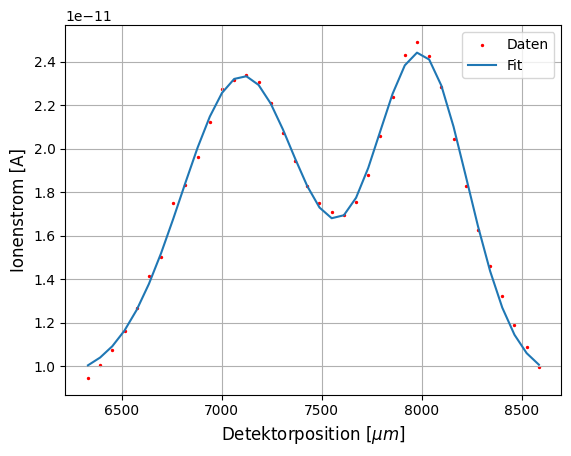

In [46]:
fitdoublegaussian(bc[0][35:73],bf1[35:73,1], (2.35*1e-11, 680*10.5, 10*10.5, 2.5*1e-11, 775*10.5, 20*10.5, 3e-12),d,ud)

In [60]:
#Daten an Gauß-Funktion fitten und ue und Unsicherheit exportieren
d,ud = [],[] 

#fitdoublegaussian(bc[0][35:74],bf1[35:74,1], (2.35*1e-11, 680*10.5, 20*10.5, 2.5*1e-11, 775*10.5, 20*10.5, 3e-12),d,ud)
#fitdoublegaussian(bc[1][65:155],bf3[65:155,1], (2*1e-11, 700*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
#fitdoublegaussian(bc[2][60:150],bf4[60:150,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
#fitdoublegaussian(bc[3][60:145],bf5[60:145,1], (1.8*1e-11, 675*10.5, 30*10.5, 1.9 *1e-11, 782*10.5,20*10.5, 21e-11),d,ud)
#fitdoublegaussian(bc[4],bf6[:,1], (2*1e-11, 660*10.5, 40*10.5, 2.1 *1e-11, 770*10.5, 20*10.5, 0.6*1e-11),d,ud)
#fitdoublegaussian(bc[5],bf7[:,1], (2*1e-11, 655*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
#fitdoublegaussian(bc[6],bf8[:,1], (2*1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 795*10.5, 40*10.5, 1e-11),d,ud)
#fitdoublegaussian(bc[7],bf9[:,1], (1.4 *1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 810*10.5, 40*10.5, 0.4 * 1e-11),d,ud)
#fitdoublegaussian(bc[8],bf10[:,1], (2*1e-11, 645*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
#fitdoublegaussian(bc[9],bf11[:,1], (1.2*1e-11, 630*10.5, 20*10.5, 1.25 *1e-11, 825*10.5, 40*10.5, 0.35*1e-11),d,ud)


ue = np.array(d)
uue = np.array(ud)
print(ue)

[]


In [10]:
#Unsicherheit der Temperatur berechnen
uT = np.array([])
for i in np.arange(0, len(uTS)):
    uT = np.append(uT,np.sqrt((uT1)**2 + (uTS[i])**2))
print(uT)

[0.28867513 0.57735027 0.57735027 0.57735027 0.57735027 0.57735027
 0.57735027 0.57735027 0.57735027 0.28867513]


In [11]:
#Unsicherheit von Stromstärke berechnen
uI = np.array([])
for i in np.arange(0,len(I)):
    uI = np.append(uI,np.sqrt((uA)**2 + (uIS[i])**2))
print(uI)

[0.50000833 0.50000833 0.50000833 0.50000833 0.50000833 0.50000833
 0.50000833 0.50000833 0.50000833 0.50000833]


In [12]:
#Approximieren des B-Feldes
B, uB = np.array([]),np.array([])
for i in np.arange(0,len(I)):
    B = np.append(B,(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 -0.24218 * I[i] **3))
    uB = np.append(uB,(np.sqrt((( 0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i])**2)))
print(uB)

[0.32772426 0.32807912 0.32536429 0.32118713 0.31228758 0.29775735
 0.281229   0.25798015 0.237492   0.20185553]


In [13]:
#Gradient des B-Feldes berechnen 
dB,udB = np.array([]),np.array([])
for i in np.arange(0,len(B)):
    dB = np.append(dB,(B[i] * eps)/(a))
    udB = np.append(udB,np.sqrt(((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))
print(dB)
print(udB)

[0.19252889 0.23373822 0.27479937 0.3060419  0.34891687 0.39612025
 0.43531077 0.47704005 0.50578241 0.54406392]
[0.31661482 0.31697328 0.31437    0.31035232 0.30178417 0.28778819
 0.27186486 0.24946752 0.22973311 0.19542225]


In [14]:
#Printen der Werte als Latex Tabelle
# for i in range(len(B)):
#         print(i+1,'&', np.round(T[i],2), "$\pm$", round(uT[i], sigfigs = 2), "&", np.round(I[i],4), "$\pm$", round(uI[i],sigfigs =2), "&", np.round(B[i],4), "$\pm$",round(uB[i],sigfigs = 2), "&",
#           np.round(dB[i],2), "$\pm$",round(udB[i],sigfigs = 2), "\\\\", "\hline")

In [15]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-L/(2*l)))
    y = np.append(y,ue[i] * 10**(-6) * 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(  udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.Boltzmann * T[i] *uue[i]/2 * 10**(-6))**2+(ue[i] * 10**(-6) * 6 * const.Boltzmann * T[i] * uT[i] )**2))

print(x)

[0.00566035 0.0068719  0.0080791  0.00899763 0.01025816 0.01164594
 0.01279814 0.01402498 0.01487    0.01599548]


Beta: [2.10199172e-21 8.17377628e-24]
Beta Std Error: [9.83182224e-23 1.16935119e-24]
Beta Covariance: [[ 3.15194514e-40 -3.59526138e-42]
 [-3.59526138e-42  4.45862080e-44]]
Residual Variance: 3.066827761467313e-05
Inverse Condition #: 0.0003366014011400736
Reason(s) for Halting:
  Sum of squares convergence


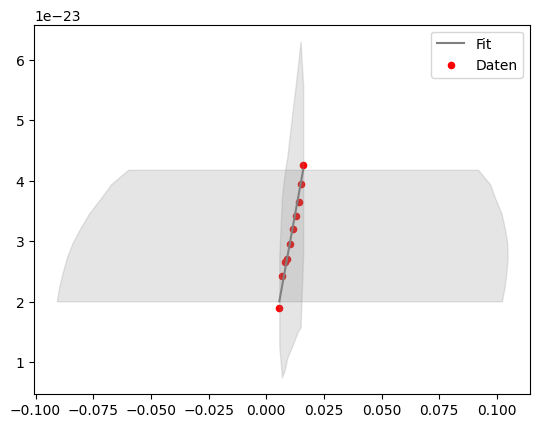

In [33]:
#Lineare Funktion
def lin_func(p, x):
    m, b = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[0., 1.])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = np.linspace(x[0], x[-1], 10)
y_fit = lin_func(out.beta, x_fit)

plt.plot(x_fit, y_fit,"-",c="gray",label="Fit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,
                 color='gray', alpha=0.2)
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="gray",alpha=0.2)
plt.legend(loc=0)
plt.show()